In [1]:
# fetching dataset
!pip install scikit-learn
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')


Defaulting to user installation because normal site-packages is not writeable


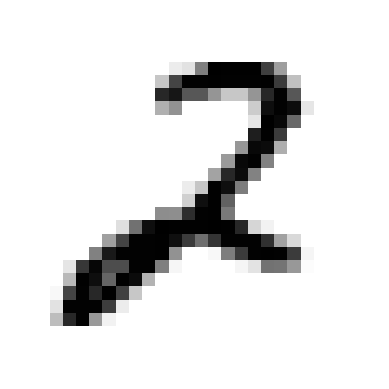

In [2]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()


In [3]:
# Splitting the dataset into training and test sets
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# Convert pandas DataFrame to NumPy arrays (if x_train and y_train are DataFrames)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

# Shuffle the training data
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a binary classifier for the digit '2'
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)


In [4]:
# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print(example)

[ True]


In [5]:
# Cross Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

0.9785499999999999


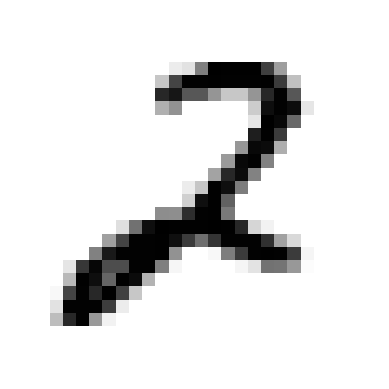

Predicted: [ True]
Mean cross-validation accuracy: 0.9786666666666667


In [6]:
# Fetching dataset
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
x, y = mnist['data'].to_numpy(), mnist['target'].to_numpy()  # Convert to NumPy arrays

# Visualize a sample digit
some_digit = x[36001]  # Pick one example
some_digit_image = some_digit.reshape(28, 28)  # Reshape for visualization

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

# Splitting the dataset into training and test sets (using NumPy arrays)
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# Shuffle the training data using NumPy indexing
shuffle_index = np.random.permutation(60000)  # Generate a shuffled index
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2-detector (binary classifier for detecting digit '2')
y_train = y_train.astype(np.int8)  # Ensure y_train is of type int8
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)  # Boolean array where True indicates '2'
y_test_2 = (y_test == 2)

# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1, max_iter=1000)  # Increase max_iter to avoid convergence issues
clf.fit(x_train, y_train_2)

# Test the classifier on the selected example digit
example = clf.predict([some_digit])
print("Predicted:", example)

# Cross-validation to check model accuracy
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print("Mean cross-validation accuracy:", a.mean())
